In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Problem 3
(No Unit Tests in this portion)

### Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

Our dataset was already scaled from Q2, so no scaling was needed here

In [92]:
reduced = np.load('delta_reduced.npy')

In [93]:
type(reduced)

numpy.ndarray

#### KMEANS --------------------------------------------------------------------------------------------

Using functions from Q1 and Q2

In [94]:
def plot_inertia(array, start=1, end=11):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    inertia = []
    for i in range(start, end):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state=0)
        kmeans.fit(reduced)
        inertia.append(kmeans.inertia_)
    x_axis = range(start, end)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    

    return ax

In [95]:
def cluster(array, random_state, n_clusters):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', max_iter = 400, n_init = 10, random_state = random_state)
    model = kmeans.fit(array)
    clusters = model.predict(array)    
      
    return model, clusters

#here we return fitted (model) and predicted (clusters) arrays as a tuple

Let's select the optimum number of clusters for k-means classification

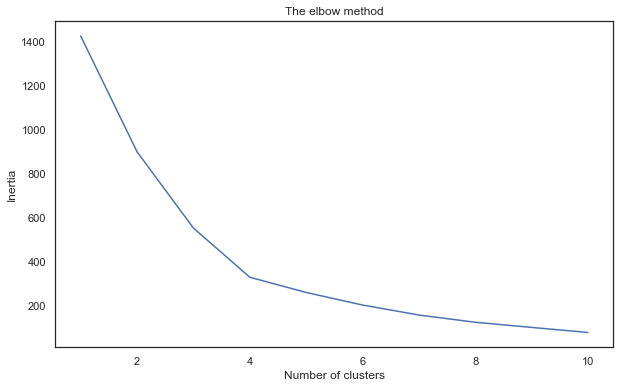

In [96]:
plot_inertia(reduced, start=1, end=11)

In [97]:
model, clusters = cluster(reduced, 0, 4)

Text(0, 0.5, 'Last Principal Component')

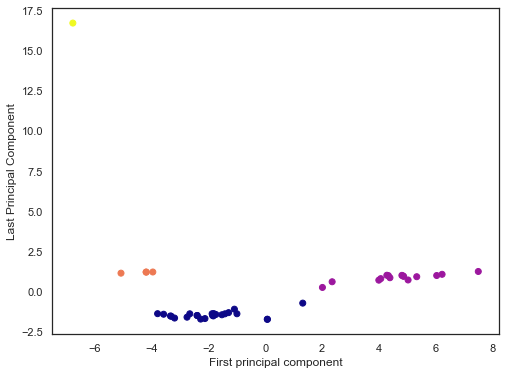

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0],reduced[:,1],c=clusters,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Last Principal Component')

#### DBSCAN --------------------------------------------------------------------------------------------

In [99]:
dbsc = DBSCAN(eps = 4, min_samples = 3).fit(reduced) # 0.3 15
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [100]:
labels

array([ 0, -1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  1,  0,
        0,  0,  0,  1,  0,  1,  1,  0,  0,  1, -1,  1,  1,  1,  1,  1,  2,
        2,  0,  0, -1,  0,  0,  2,  0,  0,  0], dtype=int64)

Text(0, 0.5, 'Last Principal Component')

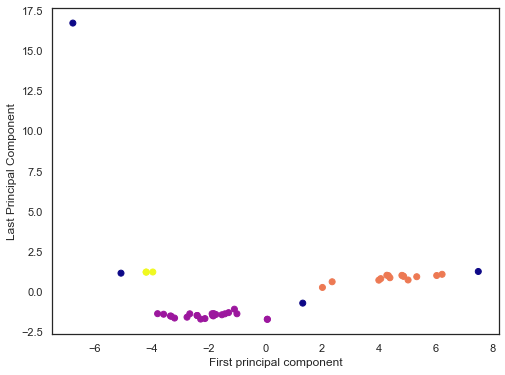

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0],reduced[:,1],c=labels,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Last Principal Component')

***COMMENT*** K-means performs better on the first two components than DBSCAN as we see above. Both the clustering techniques give us 4 clusters. 
But, K-means does better with the blue cluster as it handles noise better, even though it is sensitive to noise. K-means performs better with non-convex clustering then DBSCAN and when not too many clusters are needed. DBSCAN on the other hand does not work well since the data points are clustered on the denisty data points that are placed near to each other are considered to be part of one cluster. DBSCAN does not perform well with varying densities, and it is sensitive to data order.

### Problem 4

### Apply t-SNE reduction to delta.csv file and compare/discuss the results with PCA. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

#### t-SNE ----------------------------------------------------------------------------------------------

In [168]:
df = pd.read_csv('delta.csv')


In [169]:
df.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [170]:
features = df.iloc[:, 1:].values

In [171]:
labels = df.iloc[:, 0]

In [172]:
labels

0                      Airbus A319
1                  Airbus A319 VIP
2                      Airbus A320
3                 Airbus A320 32-R
4                  Airbus A330-200
5            Airbus A330-200 (3L2)
6            Airbus A330-200 (3L3)
7                  Airbus A330-300
8                       Boeing 717
9             Boeing 737-700 (73W)
10            Boeing 737-800 (738)
11            Boeing 737-800 (73H)
12          Boeing 737-900ER (739)
13            Boeing 747-400 (74S)
14            Boeing 757-200 (75A)
15            Boeing 757-200 (75E)
16            Boeing 757-200 (75M)
17            Boeing 757-200 (75N)
18            Boeing 757-200 (757)
19            Boeing 757-200 (75V)
20            Boeing 757-200 (75X)
21                  Boeing 757-300
22            Boeing 767-300 (76G)
23            Boeing 767-300 (76L)
24            Boeing 767-300 (76P)
25            Boeing 767-300 (76Q)
26            Boeing 767-300 (76T)
27            Boeing 767-300 (76U)
28        Boeing 767

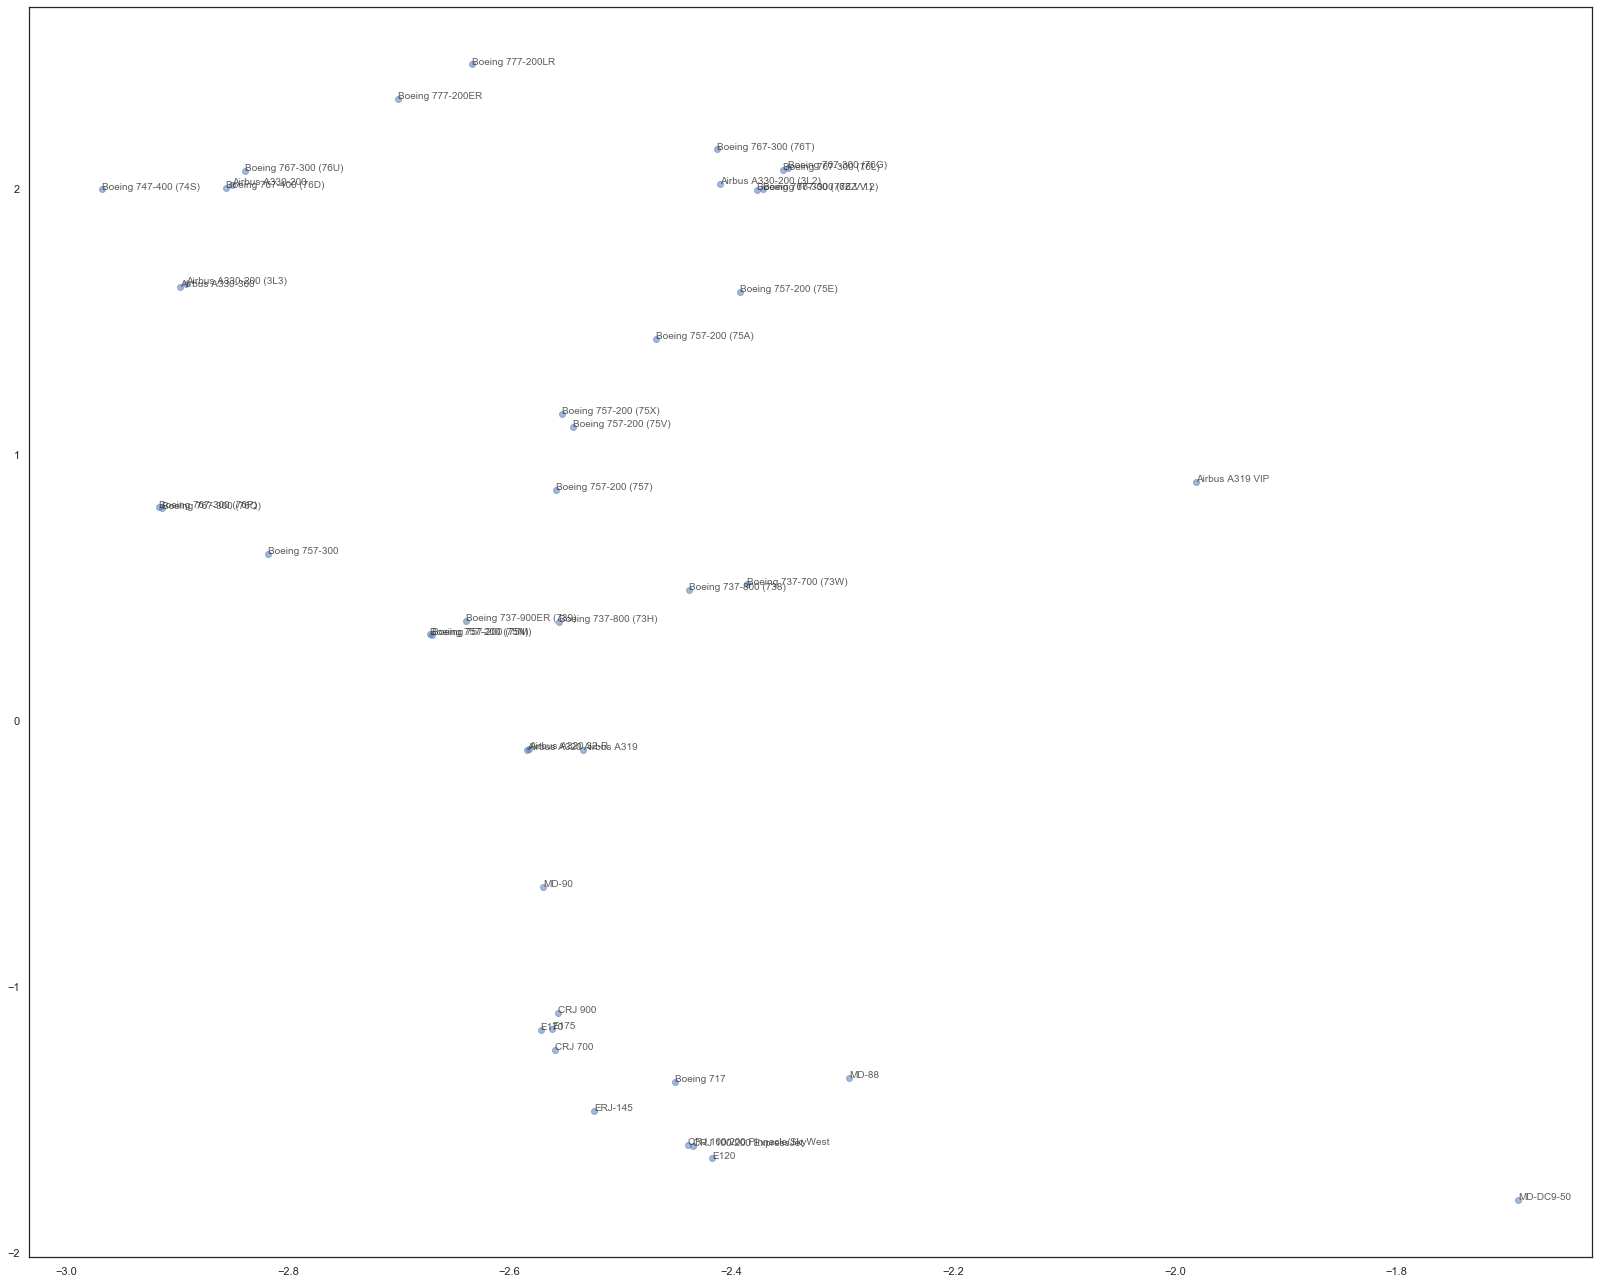

In [174]:
# Import normalize
from sklearn.preprocessing import normalize


# Normalize the movements: normalized_movements
normalized = normalize(features)



# Import TSNE
from sklearn.manifold import TSNE


plt.figure(figsize=(28,23))


# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
for x, y, company in zip(xs, ys, labels):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
#plt.figure(figsize=(18,20))
plt.show()

#### PCA ----------------------------------------------------------------------------------------------

In [175]:
 def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    model = PCA(n_components)
    pca = model.fit(df)
    return pca

In [176]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    return ax

In [177]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    stscaler = StandardScaler().fit(df)
    scaled = stscaler.transform(df)
    return scaled

In [179]:
scaled = standardize(features)

In [180]:
pca = fit_pca(scaled, n_components=33)

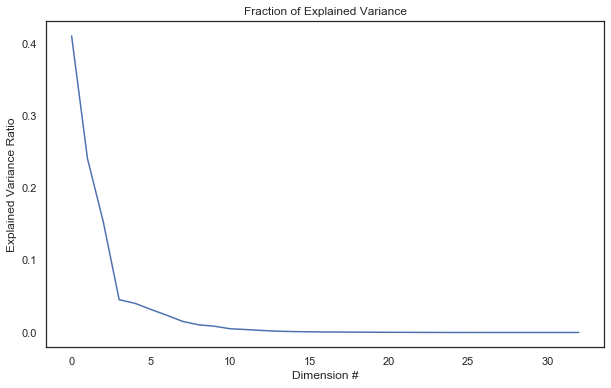

In [181]:
plot = plot_scaled_variance(pca)

In [182]:
pca


PCA(copy=True, iterated_power='auto', n_components=33, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [183]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    reduced = pca.transform(array)
    return reduced

In [184]:
reduced =  reduce(pca, scaled)

##### The first 3 components have the highest variance hence I plotted on the first three components!

In [185]:
reduced = reduced[:, 0:3]

In [186]:
type(reduced)

numpy.ndarray

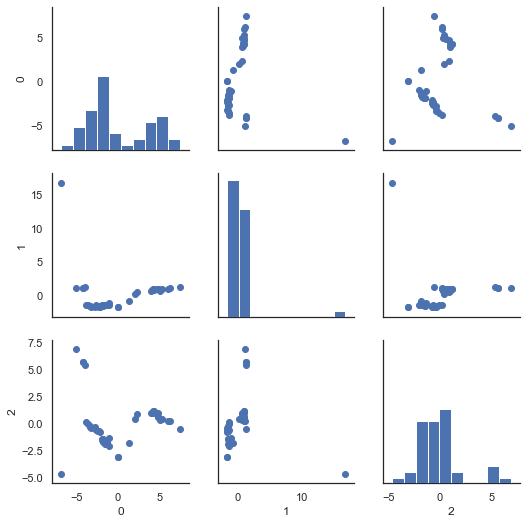

In [187]:
reduced=pd.DataFrame(reduced)

c=[0,1,2]
sns.set(style="white",color_codes=True,palette='deep')

# Make pair plot
g = sns.PairGrid(reduced)
g = g.map_offdiag(plt.scatter)
ax = g.map_diag(plt.hist)

***COMMENT***  The tsne reduction plot and PCA pair grid plot clusters the data in a very similar sense. Based on the above visualization we can see that the data is clustered into 3-4 clusters. PCA perserves large pairwise distance maximize variance. While, t-SNE preserves only local similarities. PCA gets highly affected by outliers, while t-SNE can handle outliers. The good thing about PCA is that we can find decide on how much variance to preserve using eigenvalues. For t-SNE we cannot preserve variance but instead we can preserve distance using hyperparameters.

### Problem 5 (Bonus)

### Apply Hiearchical Clustering to delta.csv and observe how physical features are being clustered in ealry leaves at the bottom. Please submit your code and dendrogram graph along with 1-2 sentences interpretation.

In [157]:
df = pd.read_csv('delta.csv')

In [158]:
df.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


The data has all your features in it

In [159]:
data = df.iloc[:, 1:].values  

In [160]:
data.shape

(44, 33)

In [161]:
labels = df.iloc[:, 0].values

In [162]:
labels

array(['Airbus A319', 'Airbus A319 VIP', 'Airbus A320',
       'Airbus A320 32-R', 'Airbus A330-200', 'Airbus A330-200 (3L2)',
       'Airbus A330-200 (3L3)', 'Airbus A330-300', 'Boeing 717',
       'Boeing 737-700 (73W)', 'Boeing 737-800 (738)',
       'Boeing 737-800 (73H)', 'Boeing 737-900ER (739)',
       'Boeing 747-400 (74S)', 'Boeing 757-200 (75A)',
       'Boeing 757-200 (75E)', 'Boeing 757-200 (75M)',
       'Boeing 757-200 (75N)', 'Boeing 757-200 (757)',
       'Boeing 757-200 (75V)', 'Boeing 757-200 (75X)', 'Boeing 757-300',
       'Boeing 767-300 (76G)', 'Boeing 767-300 (76L)',
       'Boeing 767-300 (76P)', 'Boeing 767-300 (76Q)',
       'Boeing 767-300 (76T)', 'Boeing 767-300 (76U)',
       'Boeing 767-300 (76Z V.1)', 'Boeing 767-300 (76Z V.2)',
       'Boeing 767-400 (76D)', 'Boeing 777-200ER', 'Boeing 777-200LR',
       'CRJ 100/200 Pinnacle/SkyWest', 'CRJ 100/200 ExpressJet',
       'CRJ 700', 'CRJ 900', 'E120', 'E170', 'E175', 'ERJ-145', 'MD-88',
       'MD-90', 'MD-D

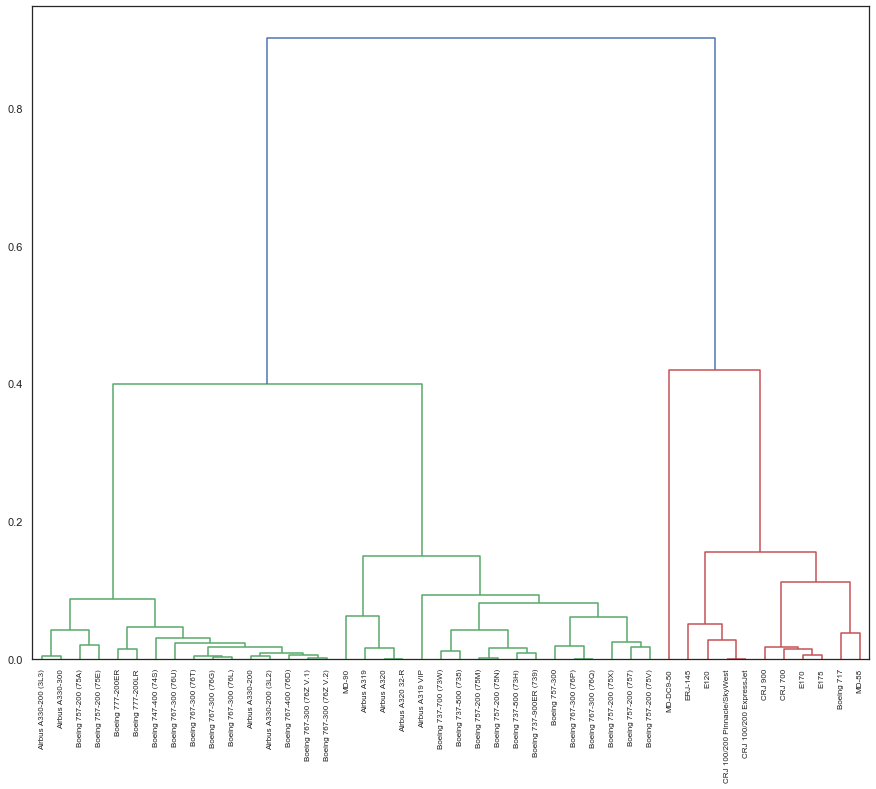

In [163]:
# Data has been normalized
from sklearn.preprocessing import normalize

# Any Pre-processing needed?
normalized_data = normalize(data)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_data, method='ward')
#"Your code here"
# Plot the dendrogram
dendrogram(
    mergings,
    labels=labels,
    leaf_rotation=90.,
    leaf_font_size=8
)


#"Your code here"
plt.show()


Based on the dendogram we decided on k as 4.

#### Hiearchical Clustering

In [164]:
from sklearn.cluster import AgglomerativeClustering

#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(normalized_data)  

array([1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
      dtype=int64)

Based on the above dendogram we can observe that the aircrafts belonging to the Airbus and in particular to A330 model have been clustered together. 
Similarly, if we look at the red tree, we can notice the CRJ 700, CRJ 900 and E170, E175 aircrafts have both first class and economy seats, hence they are under one cluster. 
The aircrafts with 757-200 make belonging to Boeing have been clustered together.
For Boeing 757-200(75A) and Boeing 757-200(75E) one of the differentiating factors can be distinction between First class and Business class seats. 75A has First class seats and 75E has business cllass seats.